In [1]:
import numpy as np
import matplotlib.pyplot as mpl
from sklearn.preprocessing import scale
from TFANN import ANNR

C:\Users\stesk\.conda\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\stesk\.conda\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\stesk\.conda\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\stesk\.conda\envs\PythonData\lib\site-packages\tensorflow\

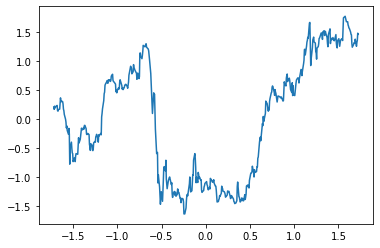

In [2]:
#reads data from the file and ceates a matrix with only the dates and the prices 
stock_data = np.loadtxt('GE_His.csv', delimiter=",", skiprows=1, usecols=(1, 4))
#scales the data to smaller values
stock_data=scale(stock_data)
#gets the price and dates from the matrix
prices = stock_data[:, 1].reshape(-1, 1)
dates = stock_data[:, 0].reshape(-1, 1)
#creates a plot of the data and then displays it
mpl.plot(dates[:, 0], prices[:, 0])
mpl.show()

In [3]:
#Number of neurons in the input, output, and hidden layers
input = 1
output = 1
hidden = 50
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', output)]
#construct the model and dictate params
mlpr = ANNR([input], layers, batchSize = 256, maxIter = 20000, tol = 0.2, reg = 1e-4, verbose = True)




The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.








In [4]:
#number of days for the hold-out period used to access progress
holdDays = 5
totalDays = len(dates)
#fit the model to the data "Learning"
mlpr.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])


 0.71105626 (Batch Size:   256)
Iter   399	      0.68595549 (Batch Size:   256)
Iter   400	      0.66785839 (Batch Size:   256)
Iter   401	      0.70304197 (Batch Size:   256)
Iter   402	      0.65234762 (Batch Size:   256)
Iter   403	      0.70485011 (Batch Size:   256)
Iter   404	      0.65391472 (Batch Size:   256)
Iter   405	      0.66289696 (Batch Size:   256)
Iter   406	      0.67260054 (Batch Size:   256)
Iter   407	      0.66574839 (Batch Size:   256)
Iter   408	      0.68989050 (Batch Size:   256)
Iter   409	      0.63269034 (Batch Size:   256)
Iter   410	      0.65552244 (Batch Size:   256)
Iter   411	      0.67340076 (Batch Size:   256)
Iter   412	      0.64731750 (Batch Size:   256)
Iter   413	      0.64380831 (Batch Size:   256)
Iter   414	      0.64050886 (Batch Size:   256)
Iter   415	      0.63593256 (Batch Size:   256)
Iter   416	      0.68244240 (Batch Size:   256)
Iter   417	      0.67656007 (Batch Size:   256)
Iter   418	      0.68643630 (Batch Size:   256)
Iter   4

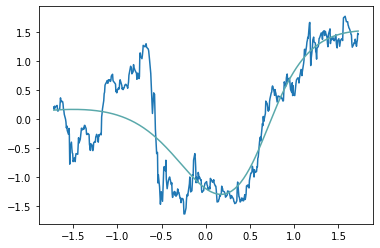

In [5]:
#Predict the stock price using the model
pricePredict = mlpr.predict(dates)
#Display the predicted reuslts agains the actual data
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.show()

In [6]:
#Number of neurons in the input, output, and hidden layers
input2 = 1
output2 = 1
hidden2 = 50
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', output2)]
#construct the model and dictate params
mlpr2 = ANNR([input2], layers, batchSize = 256, maxIter = 10000, tol = 0.1, reg = 1e-4, verbose = True)

In [7]:
holdDays = 5
totalDays = len(dates)
mlpr2.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

 0.14886565 (Batch Size:   256)
Iter  1370	      0.15787607 (Batch Size:   256)
Iter  1371	      0.14432038 (Batch Size:   256)
Iter  1372	      0.14940591 (Batch Size:   256)
Iter  1373	      0.16817595 (Batch Size:   256)
Iter  1374	      0.14338212 (Batch Size:   256)
Iter  1375	      0.15912507 (Batch Size:   256)
Iter  1376	      0.15697498 (Batch Size:   256)
Iter  1377	      0.15466637 (Batch Size:   256)
Iter  1378	      0.13980535 (Batch Size:   256)
Iter  1379	      0.14470158 (Batch Size:   256)
Iter  1380	      0.14958619 (Batch Size:   256)
Iter  1381	      0.15129769 (Batch Size:   256)
Iter  1382	      0.15498053 (Batch Size:   256)
Iter  1383	      0.16863333 (Batch Size:   256)
Iter  1384	      0.14761604 (Batch Size:   256)
Iter  1385	      0.16151746 (Batch Size:   256)
Iter  1386	      0.15583595 (Batch Size:   256)
Iter  1387	      0.15639150 (Batch Size:   256)
Iter  1388	      0.15679826 (Batch Size:   256)
Iter  1389	      0.14376319 (Batch Size:   256)
Iter  13

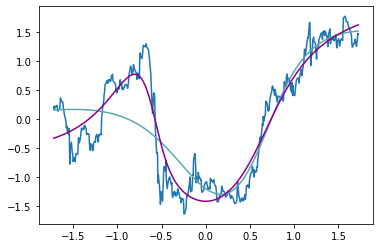

In [8]:
pricePredict2 = mlpr2.predict(dates)
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.plot(dates, pricePredict2, c='#8B008B')
mpl.show()

In [9]:
#Number of neurons in the input, output, and hidden layers
input2 = 1
output2 = 1
hidden2 = 100
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', output2)]
#construct the model and dictate params
mlpr2 = ANNR([input2], layers, batchSize = 256, maxIter = 10000, tol = 0.075, reg = 1e-4, verbose = True)

In [10]:
holdDays = 5
totalDays = len(dates)
print(totalDays)
mlpr2.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

 0.15349746 (Batch Size:   256)
Iter   648	      0.16489750 (Batch Size:   256)
Iter   649	      0.15247541 (Batch Size:   256)
Iter   650	      0.15429898 (Batch Size:   256)
Iter   651	      0.15389258 (Batch Size:   256)
Iter   652	      0.15203089 (Batch Size:   256)
Iter   653	      0.15188188 (Batch Size:   256)
Iter   654	      0.14479926 (Batch Size:   256)
Iter   655	      0.16022675 (Batch Size:   256)
Iter   656	      0.14464512 (Batch Size:   256)
Iter   657	      0.15494087 (Batch Size:   256)
Iter   658	      0.14441868 (Batch Size:   256)
Iter   659	      0.16043190 (Batch Size:   256)
Iter   660	      0.15497404 (Batch Size:   256)
Iter   661	      0.15232794 (Batch Size:   256)
Iter   662	      0.15091565 (Batch Size:   256)
Iter   663	      0.15657106 (Batch Size:   256)
Iter   664	      0.14743201 (Batch Size:   256)
Iter   665	      0.15060674 (Batch Size:   256)
Iter   666	      0.14989076 (Batch Size:   256)
Iter   667	      0.15043259 (Batch Size:   256)
Iter   6

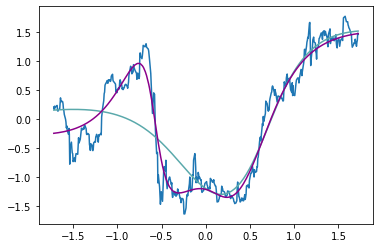

In [11]:
pricePredict2 = mlpr2.predict(dates)
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.plot(dates, pricePredict2, c='#8B008B')
mpl.show()